In [6]:
import numpy as np
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def v(r):
    return -2.3 * r**2 + r**4

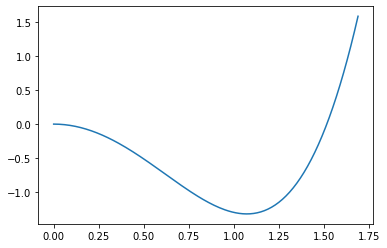

In [3]:
x = np.arange(0.,1.7,0.01)
plt.plot(x,v(x))
plt.show()

In [4]:
c = np.array([i/5 for i in range(-5,6)])
print(c)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


In [11]:
Xs = []
Ys = []
for i,t in enumerate(c):
    X = []
    while len(X) != 1000:
        xi = np.random.uniform(low=0, high=1.7)
        yi = v(xi)
        if yi >= t - 10**-3 and yi < t + 10**-3:
            X.append(xi)
            Ys.append(i)
    Xs.append(X)
Xs = np.array(Xs)
Ys = np.array(Ys)

In [12]:
print(Xs.shape)
print(Ys.shape)

(11, 1000)
(11000,)


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xs.flatten(), Ys, test_size=0.1)

In [14]:
print(x_train.shape)

(9900,)


In [15]:
print(y_train.shape)

(9900,)


In [16]:
print(x_train[0], v(x_train[0]), y_train[0])

0.7627130035125302 -0.9995704865326165 0


In [43]:
class classifier2(nn.Module):
    def __init__(self, nlabel):
        super(classifier, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, nlabel),
            #nn.Softmax(),
        )

    def forward(self, input):
        return self.main(input)

In [52]:
class classifier(nn.Module):
    def __init__(self, nlabel):
        super(classifier, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, nlabel)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        xh = F.relu(self.fc2(x))
        x = self.fc3(xh)
        return x

In [53]:
modelx = classifier(11).float()

In [54]:
optimizer = optim.Adam(modelx.parameters())
criterion = nn.CrossEntropyLoss()

In [55]:
train = x_train
labels = y_train

In [56]:
def accuracy(predictions, labels):
    classes = torch.argmax(predictions, dim=1)
    return torch.mean((classes == labels).float())

In [58]:
epochs = 20
for epoch in range(epochs):
    losses = []
    accs = []
    acc = 0
    for i, sample in enumerate(train):
        inputv = Variable(torch.as_tensor([sample]).float())
        labelsv = torch.tensor([labels[i]]).long()
        
        output = modelx(inputv).resize(1,11)
        loss = criterion(output, labelsv)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc += accuracy(output, labelsv)
    acc /= Ys.shape[0]
    acc = acc.item()
    losses.append(loss)
    accs.append(acc)
    print(acc)
    print('[%d/%d] Loss: %.3f' % (epoch+1, epochs, loss))

/home/tdhttt/anaconda3/envs/qml/lib/python3.6/site-packages/torch/tensor.py:358: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


0.5417272448539734
[1/20] Loss: 0.923
0.7855454683303833
[2/20] Loss: 0.561
0.8665454387664795
[3/20] Loss: 0.213
0.8825454711914062
[4/20] Loss: 0.070
0.8899999856948853
[5/20] Loss: 0.038
0.889090895652771
[6/20] Loss: 0.080
0.893818199634552
[7/20] Loss: 0.168
0.8926363587379456
[8/20] Loss: 0.060
0.8939090967178345
[9/20] Loss: 0.022
0.8934545516967773
[10/20] Loss: 0.008
0.8926363587379456
[11/20] Loss: 0.005
0.8930909037590027
[12/20] Loss: 0.059
0.8939999938011169
[13/20] Loss: 0.149
0.8960909247398376
[14/20] Loss: 0.001
0.8940908908843994
[15/20] Loss: 0.002
0.8962727189064026
[16/20] Loss: 0.002
0.8954545259475708
[17/20] Loss: 0.001
0.895545482635498
[18/20] Loss: 0.001
0.8961818218231201
[19/20] Loss: 0.000
0.8964545726776123
[20/20] Loss: 0.012


In [81]:
#w = list(modelx.parameters())
#print(w[-3].shape)
#
#from sklearn.manifold import TSNE
#
#tsne = TSNE(n_components = 2, perplexity = 50)
#Xw = w[-3].detach().numpy().reshape(-1,1)
#Yw = tsne.fit_transform(Xw)
#print(Xw.shape, Yw.shape)
#
#plt.scatter(Yw[:,0], Yw[:,1])
#plt.show()

In [85]:
modelx_hidden_layer = nn.Sequential(*[modelx.fc1,modelx.fc2])
print(modelx_hidden_layer)

Sequential(
  (0): Linear(in_features=1, out_features=64, bias=True)
  (1): Linear(in_features=64, out_features=64, bias=True)
)


In [95]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

norm = Normalize(vmin=0, vmax=11)
cmap = cm.autumn
hiddens = []
color_hiddens = []
for i, sample in enumerate(train):
    inputv = Variable(torch.as_tensor([sample]).float())
    output = modelx_hidden_layer(inputv)
    hiddens.append((output.detach().numpy()))
    color_hiddens.append(cmap(norm(labels[i])))

In [96]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity = 50)
hiddens_tsne = tsne.fit_transform(hiddens)

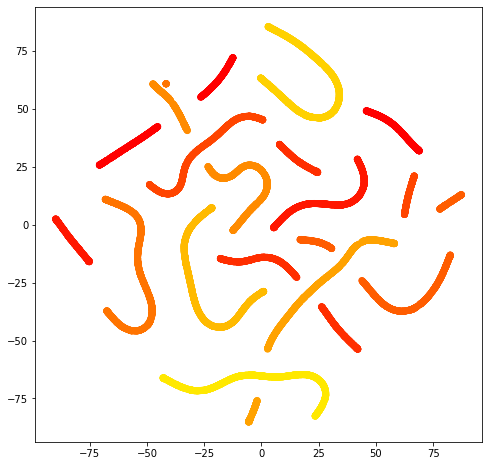

In [97]:
plt.figure(figsize=(8,8))
plt.scatter(x=hiddens_tsne[:,0],y=hiddens_tsne[:,1],color=color_hiddens)
plt.title("Perplexity = 50")
plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity = 100)
hiddens_tsne = tsne.fit_transform(hiddens)
plt.figure(figsize=(8,8))
plt.scatter(x=hiddens_tsne[:,0],y=hiddens_tsne[:,1],color=color_hiddens)
plt.title("Perplexity = 100")
plt.show()